In [291]:
#importando biblioteca
import pandas as pd

In [292]:
#leitura de arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [293]:
df5.head(
    
)

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [294]:
#Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [295]:
#exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [296]:
#exibindo as 5 ultimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [297]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
116,Salvador,2019-03-02,41.78,1034,3
95,Salvador,2019-01-01,5.13,1035,1
23,Recife,2019-01-01,37.51,982,2
214,Natal,2019-01-02,54.94,1036,2
69,Natal,2019-03-24,817.00,852,4


In [298]:
#verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [299]:
#alterando o tipo de dado da coluna LojaID
df["LojaID"] =df["LojaID"].astype("object")


In [300]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [301]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [302]:
#consultando linhas com faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [303]:
#substituindo os valores nulo pela media
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [304]:
df["Vendas"].mean()

122.61180089485458

In [305]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [306]:
#Apagando as linhas com valores nulos
df.dropna(inplace =True)

In [307]:
#apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset =["Vendas"],inplace =True)

In [308]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how =  "all",inplace=True)

In [309]:
#criando colunas de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [310]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [311]:
df["Receita/Vendas"] =df["Receita"] / df["Vendas"]

In [312]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [313]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [314]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [315]:
#nlargest
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [316]:
#nsmallest
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [317]:
#agrupamento por cidade 
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [318]:
#Ordenando o conjunto de dados
df.sort_values("Receita" , ascending = False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [319]:
#verificando o tipo de cada coluna
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [320]:
#transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [321]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [322]:
#agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [323]:
#criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [324]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
196,Natal,2019-01-02,145.09,1036,2,290.18,2.0,2019
42,Salvador,2019-01-01,44.28,1034,1,44.28,1.0,2019
64,Fortaleza,2019-01-01,110.31,1005,4,441.24,4.0,2019
47,Fortaleza,2019-01-01,13.45,1004,5,67.25,5.0,2019
64,Aracaju,2018-01-01,21.00,1523,5,105.00,5.0,2018


In [325]:
#Extraindo o mes e o dia
df["mes_venda"],df["dia_venda"] = (df["Data"].dt.month,df["Data"].dt.day)

In [326]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
115,Recife,2019-03-02,12.23,981,3,36.69,3.0,2019,3,2
182,Salvador,2019-01-02,6.60,1037,2,13.20,2.0,2019,1,2
110,Recife,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2
74,Recife,2019-01-01,38.79,983,6,232.74,6.0,2019,1,1
203,Salvador,2019-01-02,37.75,1035,2,75.50,2.0,2019,1,2


In [327]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [328]:
#criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [329]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,trimestre_venda
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018,1,1,1
80,Recife,2019-01-01,114.14,982,8,913.12,8.0,2019,1,1,1
98,Recife,2019-01-01,137.34,981,8,1098.72,8.0,2019,1,1,1
60,Fortaleza,2019-01-01,182.14,1002,4,728.56,4.0,2019,1,1,1
104,Fortaleza,2019-01-01,40.50,1005,2,81.00,2.0,2019,1,1,1


In [330]:
#filtrando as vendas de 2019 do mes de março
vendas_marco_19 = df.loc[(df["Data"].dt.year ==2019) & (df["Data"].dt.month ==3)]

In [331]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,1


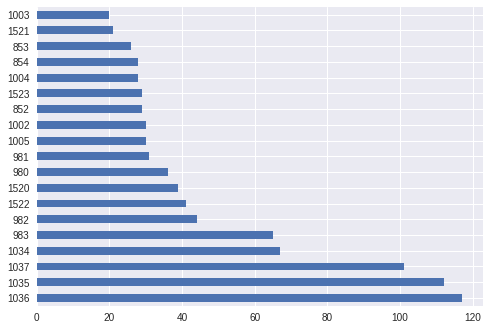

In [332]:
#grafico de barras horizontais
df["LojaID"].value_counts().plot.barh()

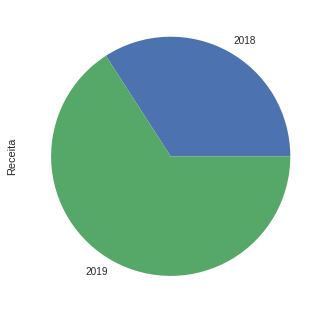

In [333]:
#grafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [334]:
#Total venda por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total de vendas')

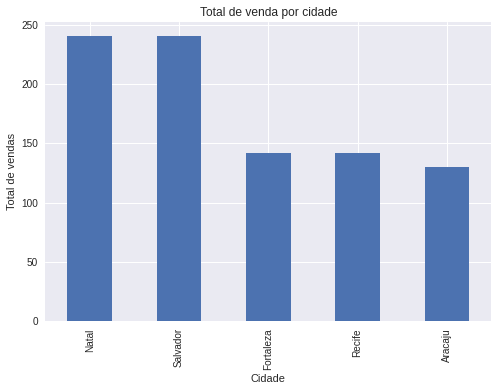

In [335]:
#Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de venda por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas")


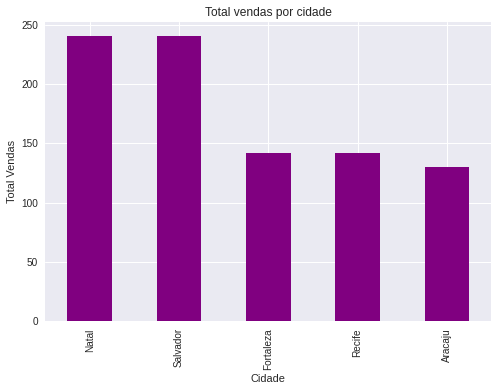

In [336]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade",color="purple")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [337]:
#alterando os estilos
plt.style.use("ggplot")

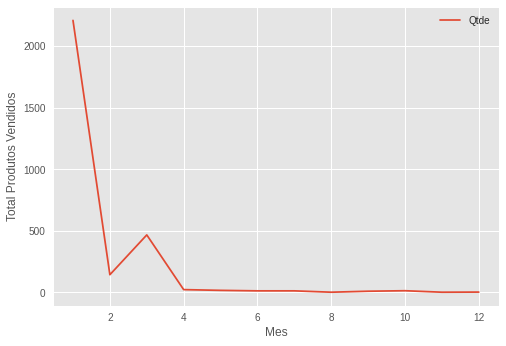

In [338]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot()
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos")
plt.legend()

In [339]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [340]:
#selecionando venda de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

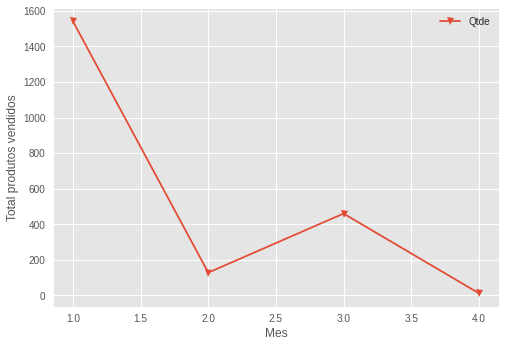

In [341]:
#Total produtos vendidos por mes
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker ="v")
plt.xlabel("Mes")
plt.ylabel("Total produtos vendidos");
plt.legend()

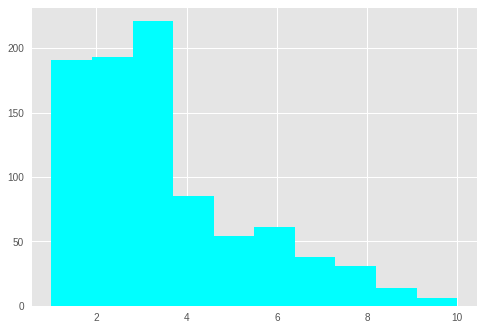

In [342]:
#Hisograma
plt.hist(df["Qtde"],color ="cyan");

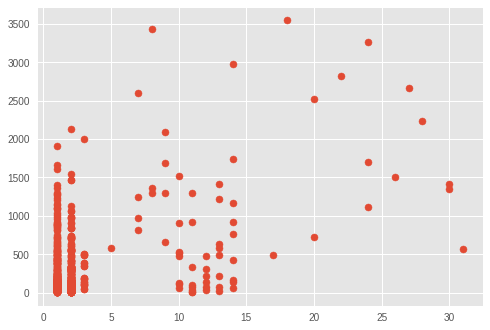

In [343]:
plt.scatter(x=df_2019["dia_venda"],y=df_2019["Receita"]);

In [344]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")


In [345]:
#upload do arquivo
from google.colab import files
arq = files.upload()

In [346]:
#criando  dataframe
df =pd.read_excel("AdventureWorks.xlsx")

In [347]:
#vizualizando as  cinco primeiras linhas
df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [348]:
#Qualidade de linhas e colunas
df.shape

(904, 16)

In [349]:
#verificando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [350]:
#qual foi a receita total
df["Valor Venda"].sum()

5984606.1426

In [351]:
#Qual foi o custo total
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"])

In [352]:
round(df["custo"].sum(),2)

2486783.05